# Project 1
## Integration of Mergesort & Insertion Sort

In [3]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### a) Algorithm Implementation

### Insertion Sort

In [4]:
def insertionSort(arr):
   
    for i in range(1, len(arr)): # Traverse through array from index 1
 
        key = arr[i] # Pick up value at each index starting from index 1

        j = i-1 # j is to present the indexes before the key index
        while j >= 0 and key < arr[j] :
            arr[j + 1] = arr[j]
            j -= 1
            # While the elements before the key are greater than the key
            # Move elements one to the right 
        arr[j + 1] = key 
        # Once the element is smaller than the key
        # Insert the key to the right of that element
    return arr

### Hybrid Sort

#### Merge Function

In [5]:
def merge(arr1, arr2): 
    i = j = 0 
    sorted_arr = [] 
    while (i != len(arr1) and j != len(arr2)): 
        if arr1[i] < arr2[j]: 
            sorted_arr.append(arr1[i]) 
            i += 1 
        elif arr1[i] > arr2[j]: 
            sorted_arr.append(arr2[j]) 
            j += 1 
        else: 
            sorted_arr.append(arr1[i]) 
            sorted_arr.append(arr2[j]) 
            i += 1 
            j += 1 
    while i != len(arr1): 
        sorted_arr.append(arr1[i]) 
        i += 1 
    while j != len(arr2): 
        sorted_arr.append(arr2[j]) 
        j += 1 
    return sorted_arr


In [6]:
def hybridSort(arr,S):
    if len(arr)<=1:
        return arr
    
    if len(arr) > S:
        m = len(arr)//2 # Find midpoint m
 
        # Sort first and second halves
        arr[:m] = hybridSort(arr[:m],S)
        arr[m:] = hybridSort(arr[m:],S)
        arr = merge(arr[:m], arr[m:])
        
        return arr
    else:
        arr = insertionSort(arr)
        return arr

In [9]:
arr = [3,6,8,9,2,1,4,5,10,7,12,11,3,3,3]
a = hybridSort(arr,4)
print(a)
type(a)

[1, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


list

## b) Generate input data (data array sizes)

In [14]:
arrSizes = []

for i in range(10):
    arrSizes.append(1000*(i+1))
    arrSizes.append(10000*(i+1))
    arrSizes.append(100000*(i+1))
    arrSizes.append(1000000*(i+1))

In [78]:
arrSizes = list(dict.fromkeys(arrSizes))
arrSizes.sort()
print(arrSizes)

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]


In [80]:
arrOfArrays = []


for siz in arrSizes:
    arr = np.random.randint(1000, size=siz)
    arrOfArrays.append(arr)
    
print(arrOfArrays[0])

[720 326 458  29   6 976 527 853 343 784  43 114 262 844  56 808 174 751
 581 723 340 480 911 388 910  19 208 947 956 775 834 774 243 381 127 310
 201 405 969 143 213  55 805 966 315 221 362 305 497 274 789 892 513 776
 712 716 222 532 471 991 468 542 524 379 856 455 633 135 180 867   8 659
  65 452  70 884 914 165 654 810 669 151 552 756 605 573 930 464 320 670
 854 628 976 926 103 762 467 873 843 253 504 606 184  75 789 279 622 109
  90 978 759 658 292 165  23 191 754 592  31 512 432 138  81 480 560 702
 441 192 136 974 618 252  11 942 234 501 367 606 337 317 492 203 810 249
 419 590 622 549 464 954 960 937 151 840 229  22 280 503 541 797 909 933
 302 289 723 858 390 522   6 726 442  62 826  73 925  40 635 639 846 365
 453 380 691 538  59 286 358 730 279 486 491 106 506 406 160  34 555 490
 523 388  40 827 835 303 820 842 636 285 227 817 319 388 980 883 837  46
 173 341 107  58 973 425 191 938  95 391 492 832 757 864 894 328 103 230
 485 311 706 431 701 186 281 983 528 798 847 323 21

## c) Analyze time complexity

### Count key comparisons

In [19]:
def insertionSort2(arr):
    comparisons = 0
    for i in range(1, len(arr)):
        key = arr[i] 
        j = i-1 
        while j >= 0 and key < arr[j] :
            comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
        if j > 0 :
            comparisons += 1
        arr[j + 1] = key 
    return arr, comparisons

def merge2(arr1, arr2): 
    comparisons = 0 
    i = j = 0 
    sorted_arr = [] 
    while (i != len(arr1) and j != len(arr2)): 
        if arr1[i] < arr2[j]: 
            sorted_arr.append(arr1[i]) 
            i += 1 
        elif arr1[i] > arr2[j]: 
            sorted_arr.append(arr2[j]) 
            j += 1 
        else: 
            sorted_arr.append(arr1[i]) 
            sorted_arr.append(arr2[j]) 
            i += 1 
            j += 1 
        comparisons += 1 
    while i != len(arr1): 
        sorted_arr.append(arr1[i]) 
        i += 1 
    while j != len(arr2): 
        sorted_arr.append(arr2[j]) 
        j += 1 
    return sorted_arr, comparisons

def hybridSort2(arr,S):
    comparisons = 0
    if len(arr)<=1:
        return arr, comparisons
    
    if len(arr) > S:
        
        m = len(arr)//2 
        
        arr[:m], first_half_comparisons = hybridSort2(arr[:m],S)
        comparisons += first_half_comparisons
        
        arr[m:], second_half_comparisons = hybridSort2(arr[m:],S)
        comparisons += second_half_comparisons
        
        arr, merge_comparisons = merge2(arr[:m], arr[m:]) 
        comparisons += merge_comparisons
        
        return arr, comparisons
    
    else:
        
        arr, comparisons = insertionSort2(arr)
        return arr, comparisons
    
# def hybridSort3(arr, S):
#     comparisons = 0
#     if len(arr) <=1:
#         return arr, comparisons
#     # Mergesort if Arr > size S
#     if len(arr) > S: 
#         # Finding the mid of the array
#         mid = len(arr)//2

#         # Sorting the first half of the array
#         arr[:mid], temp = hybridSort2(arr[:mid], S)
#         comparisons += temp
    
#         # Sorting the second half of the array
#         arr[mid:], temp = hybridSort2(arr[mid:], S)
#         comparisons += temp
  
#         i = 0
#         j = mid
       
#         # Merge 2 halves of the array
#         while i < j and j < len(arr):
#             if arr[i] <= arr[j]:
#                 i += 1
#             else:
#                 item = arr[j]
#                 arr[i+1:j+1] = arr[i:j]
#                 arr[i] = item
#                 i += 1
#                 j += 1
#             comparisons += 1

#         return arr, comparisons
#     else:
#         arr, comparisons = insertionSort2(arr)
#         return arr, comparisons

### i. With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.

In [44]:
from random import seed
from random import randint

np.random.seed(22)
arrSize = []

for i in range(1000):
    arrSize.append(i)
    
s = 10

if __name__ == '__main__':
    sizeComparisons = []
    for siz in arrSize:
        arr = np.random.randint(10000, size=siz)
        arr, comparisons = hybridSort2(arr,s)
        sizeComparisons.append(comparisons)

In [45]:
import math

theorectical_comparisons = []
for siz in arrSize:
    if siz == 0:
        theorectical_comparisons.append(0)
    else:
        c = siz * math.log2(siz/s) - (siz/s - 1) + siz/s * (s-1) * (s+2)/4
        theorectical_comparisons.append(c)

Text(0.5, 1.0, 'Key Comparisons against Array Size')

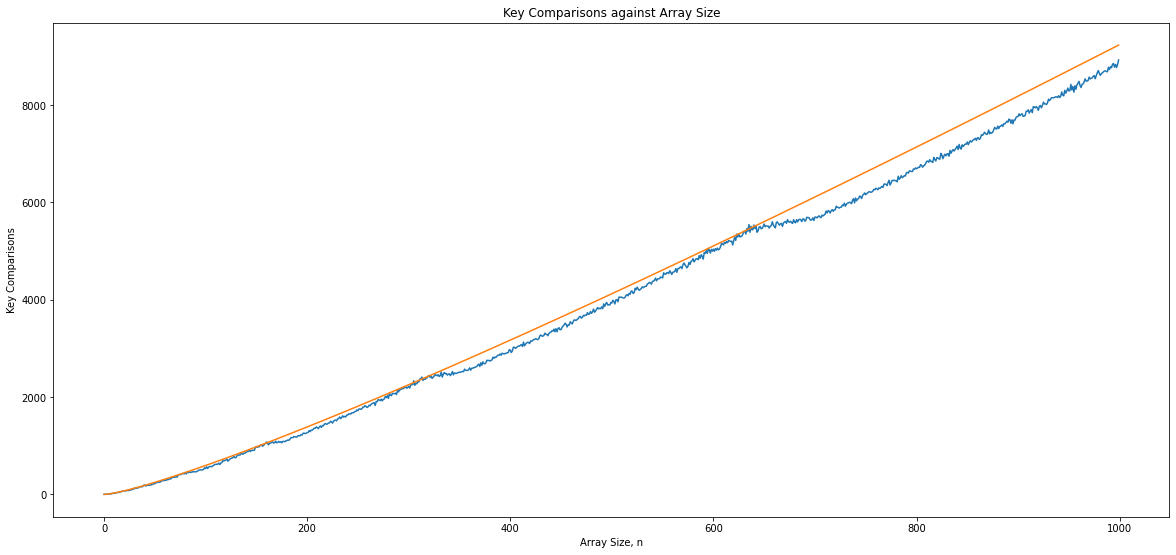

In [46]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(arrSize, sizeComparisons)
ax.plot(arrSize, theorectical_comparisons)
ax.set_xlabel("Array Size, n")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Array Size")


#### ii. With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity.

In [82]:
np.random.seed(22)
if __name__ == '__main__':
 sValues = range(0,100)
 arraySize = 10000 # Set array size to 10000
 sComparisons = []
 for s in sValues:
    arr = np.random.randint(10000,size = arraySize)
    arr, comparisons = hybridSort2(arr,s)
    sComparisons.append(comparisons)
    


In [85]:
theorectical_comparisons = []
for s in sValues:
    if s == 0:
        theorectical_comparisons.append(0)
    else:
        a = arraySize * math.log2(arraySize/s) - (arraySize/s - 1) + arraySize/s * (s-1) * (s+2)/4
        theorectical_comparisons.append(a)

Text(0.5, 1.0, 'Key Comparisons against Threshold Values, S')

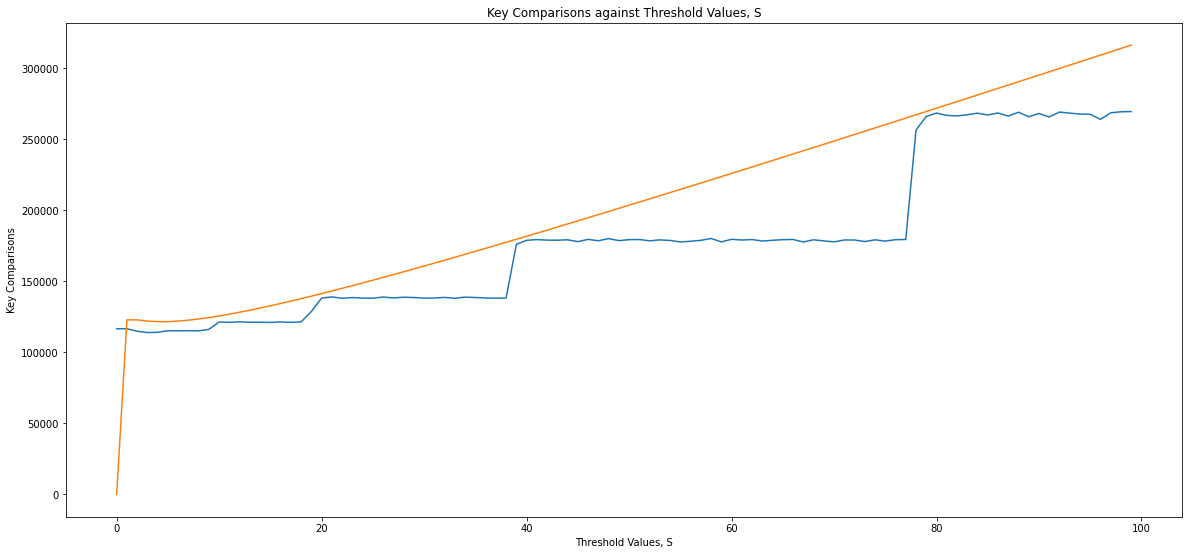

In [86]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(sValues,sComparisons) 
ax.plot(sValues,theorectical_comparisons) 
ax.set_xlabel("Threshold Values, S")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Threshold Values, S")


### iii. Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

In [71]:
def mergeSort(arr):
    comparisons = 0
    if len(arr)<=1:
        return arr, comparisons
    else:
        m = len(arr)//2 
        arr[:m], first_half_comparisons = mergeSort(arr[:m])
        comparisons += first_half_comparisons
        arr[m:], second_half_comparisons = mergeSort(arr[m:])
        comparisons += second_half_comparisons
        arr, merge_comparisons = merge2(arr[:m], arr[m:]) 
        comparisons += merge_comparisons
        
        return arr, comparisons
    

Optimal S is: 9


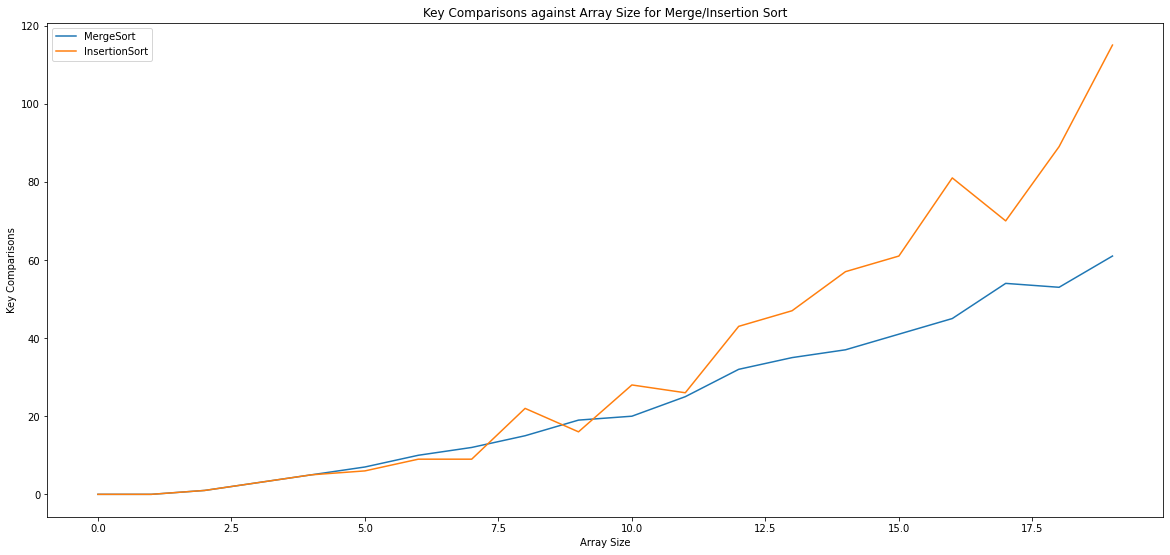

In [72]:
np.random.seed(22)
if __name__ == '__main__':
 optimalS = 0
 arraySize = range(0,20)
 mergeComparisons = []
 insertionComparisons = []
 mergeComparison = 0
 for s in arraySize:
    arr = np.random.randint(10000,size = s)
    arr2 = arr.copy()
    arr,mergeComparison = mergeSort(arr)
    arr2, insertionComparison = insertionSort2(arr2)
    if insertionComparison < mergeComparison:
        optimalS = s
    mergeComparisons.append(mergeComparison)
    insertionComparisons.append(insertionComparison)
    
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(arraySize,mergeComparisons, label="MergeSort") 
ax.plot(arraySize, insertionComparisons, label = "InsertionSort")
ax.set_xlabel("Array Size")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Array Size for Merge/Insertion Sort")
ax.legend()

print('Optimal S is:', optimalS)

### (d) Compare with original Mergesort: Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.

In [14]:
np.random.seed(22)
if __name__ == '__main__':
        arr10mil = []
        arr10mil = np.random.randint(10000000,size =10000000)
        arr10mil_2 = arr10mil.copy()

        start_time1 = time.time()
        arr10mil, hybridComparisons = hybridSort2(arr10mil, 9)
        end_time1 = (time.time() - start_time1)

        start_time2 = time.time()
        arr10mil_2, mergeComparisons = mergeSort(arr10mil_2)
        end_time2 = (time.time() - start_time2)

print("CPU Time for Hybrid Sort is:", end_time1)
print("CPU Time for Merge Sort is:", end_time2)  
print("Key Comparisons for Hybrid Sort is:", hybridComparisons)  
print("Key Comparisons for Merge Sort is:", mergeComparisons)  

CPU Time for Hybrid Sort is: 119.00749015808105
CPU Time for Merge Sort is: 141.6262309551239
Key Comparisons for Hybrid Sort is: 217041833
Key Comparisons for Merge Sort is: 216324238
